In this we will try to solve the advection diffusion equation of the form 
$$u_t=bu_{xx}$$
with I.C
$$u(x,0)=\sin(\pi x)$$
$$u(0,t)=0,\,\, u(1,t)=0$$

In [265]:
import numpy as np
#from math import pi
import matplotlib.pyplot as plt
import time

# Parameters
X = 1.0
T = 1.0
M, N = 80, 160  # total grid points - 1
h = X/ M
k = T/N
#a = 1
b = 1
l = b*k/h**2 # stability parameter for diffusion
#r = a*h/2*b # reynolds number

In [266]:
# Grid
x = np.linspace(0, X, M+1)
t = np.linspace(0, T, N+1)

#initialising u
u = np.zeros([M+1,N+1])
u_exact = np.zeros([M+1,N+1])
err = np.zeros([M+1,N+1])
u_int = np.zeros([M-1,N+1])

# initial condition 
u0 = np.sin(np.pi*x)
u_int[:,0]=u0[1:-1]

In [267]:
A = np.zeros([M-1,M-1])
for i in range(M-1):
    A[i, i] = -2
    if i > 0:
        A[i, i-1] = 1
    if i < M-2:
        A[i, i+1] = 1
B = np.eye((M-1))
C = np.zeros([M-1])
#print("A",A,"B",B)

### FTCS Method

In [268]:



#FTCS method
FT = B+l*A
start = time.time()
for n in range(0,N):
    C[0] = -l*0 # left B. C
    C[M-2] = -l*0 # right B.C
    u_int[:,n+1]= np.matmul(FT,u_int[:,n])+ C
    
u[1:M,:]=u_int
stop = time.time()
#print("FTCS=",FT,"l",l)

/var/folders/h7/f9q33cc93z77gp9c7qg53yvh0000gn/T/ipykernel_55173/3984048119.py:7: RuntimeWarning: overflow encountered in matmul
  u_int[:,n+1]= np.matmul(FT,u_int[:,n])+ C
/var/folders/h7/f9q33cc93z77gp9c7qg53yvh0000gn/T/ipykernel_55173/3984048119.py:7: RuntimeWarning: invalid value encountered in matmul
  u_int[:,n+1]= np.matmul(FT,u_int[:,n])+ C


In [269]:
for i in range (0,M+1):
    for j in range (0,N+1):
        u_exact [i,j] = np.exp(-np.pi**2*t[j])*np.sin(np.pi*x[i]) 
        #err[i,j] = abs(u[i,j]-u_exact[i,j]) 
err = abs(u-u_exact) 
print("lamda = ",l)
print("max_error = ",err.max())
print("computational time ", stop-start)

lamda =  39.99999999999999
max_error =  nan
computational time  0.0028181076049804688


<Figure size 800x400 with 0 Axes>

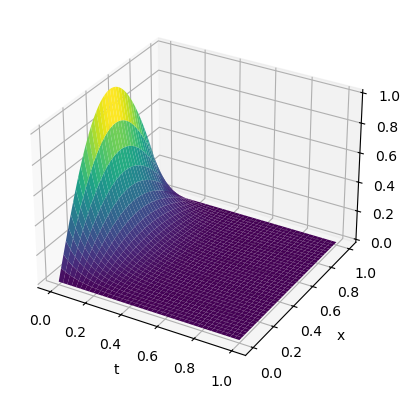

In [270]:
X1, T1 = np.meshgrid(t, x)        # match shape of u(x,t)
plt.figure(figsize=(8, 4))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, T1, u_exact, cmap='viridis')

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

plt.show()

### BTCS Method

In [271]:
# BTCS Method

BT = B-l*A
start = time.time()
for n in range(1,N+1):
    C[0] = -l*0 # left B. C
    C[M-2] = -l*0 # right B.C
    u_int[:,n]= np.linalg.solve(BT,u_int[:,n-1]+ C)
u[1:M,:]=u_int
stop = time.time()

In [272]:
for i in range (0,M+1):
    for j in range (0,N+1):
        u_exact [i,j] = np.exp(-np.pi**2*t[j])*np.sin(np.pi*x[i]) 
err = abs(u-u_exact) 
print("lamda = ",l)
print("max_error = ",err.max())      

print("computational time ", stop-start)

lamda =  39.99999999999999
max_error =  0.011106147937507749
computational time  0.0038449764251708984


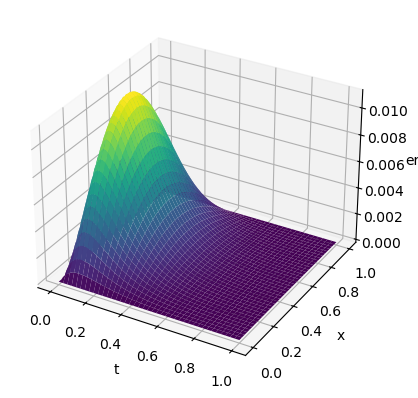

In [273]:
X1, T1 = np.meshgrid(t, x)        # match shape of u(x,t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, T1, err, cmap='viridis')

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('err')

plt.show()


### Crank Nicholoson Method

In [274]:
# crank Nicholoson method

CNL = B-l/2*A
CNR = B+l/2*A

start = time.time()
for n in range(1,N+1):
    C[0] = -l/2*0 # left B. C
    C[M-2] = -l/2*0 # right B.C
    u_int[:,n]= np.linalg.solve(CNL,np.matmul(CNR,u_int[:,n-1])+ C)
u[1:M,:]=u_int
stop = time.time()

In [275]:
for i in range (0,M+1):
    for j in range (0,N+1):
        u_exact [i,j] = np.exp(-np.pi**2*t[j])*np.sin(np.pi*x[i]) 
err = abs(u-u_exact) 
print("lamda = ",l)
print("max_error = ",err.max())  

print("computational time ", stop-start)

lamda =  39.99999999999999
max_error =  6.938502111453193e-05
computational time  0.00459599494934082


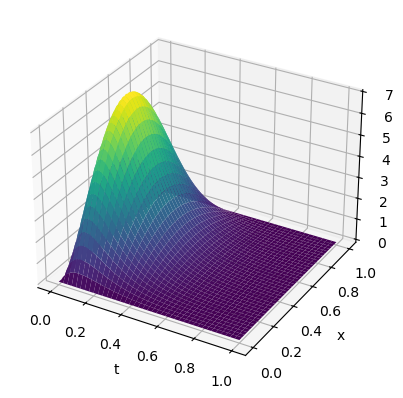

In [276]:
X1, T1 = np.meshgrid(t, x)        # match shape of u(x,t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, T1, err, cmap='viridis')

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('err')

plt.show()